<a href="https://colab.research.google.com/github/dsadasafd/CNN/blob/main/CNN_mnist_first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('./mount')

Mounted at ./mount


In [4]:
import torch
import torch.nn as nn
import numpy, pandas, random
import matplotlib.pyplot as plt
from torch.utils.data import Dataset


In [5]:
class MnistDataset(Dataset):


  # 超调用继承
  def __init__(self, csv_file):

    self.data_df = pandas.read_csv(csv_file, header=None)
    pass



  def __len__(self):
    return len(self.data_df)



  def __getitem__(self, index):

    # dataset body content
    label = self.data_df.iloc[index, 0]
    target = torch.zeros((10))
    target[label] = 1.0

    image_data = torch.FloatTensor(self.data_df.iloc[index, 1:].values)/255.0

    return label, image_data, target



  def plot_image(self, index):

    image_arr = self.data_df.iloc[index, 1:].values.reshape(28,28)
    plt.imshow(image_arr, interpolation='none', cmap='Blues')
    plt.title('label = ' + str(self.data_df.iloc[index, 0]))

    pass


In [6]:
## load data

mnist_dataset = MnistDataset('mount/My Drive/Colab Notebooks/mnist_data/mnist_train.csv')

<class 'tuple'>


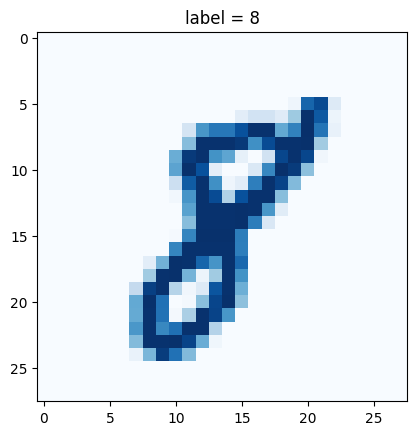

In [13]:
## check the data

mnist_dataset.plot_image(17)
mnist_dataset[17]
print(type(mnist_dataset[17]))

In [8]:
class View(nn.Module):
  def __init__(self, shape):
    super().__init__()
    self.shape = shape,

  def forward(self, x):
    return x.view(*self.shape)


# 随机图像数据
def generate_random_image(size):
  random_data = torch.rand(size)
  return random_data

# 生成器随机种子
def generate_random_seed(size):
  random_data = torch.randn(size)
  return random_data

In [14]:
# 创建一个分类器

class Classifier(nn.Module):

  def __init__(self):

    # 初始化继承父类
    super().__init__()

    # 构建网络body
    self.model = nn.Sequential(

        nn.Conv2d(1, 10, kernel_size=5, stride=2),
        nn.LeakyReLU(0.02),
        nn.BatchNorm2d(10),

        nn.Conv2d(10, 10, kernel_size=3, stride=2),
        nn.LeakyReLU(0.02),
        nn.BatchNorm2d(10),

        View(250),
        nn.Linear(250, 10),
        nn.Sigmoid()

    )

    # 损失函数使用MSELoss
    self.loss_function = nn.BCELoss()

    # 优化器使用
    self.optimiser = torch.optim.Adam(self.parameters())

    # 计数器和loss记录
    self.counter = 0
    self.progress = []

    pass



  def forward(self, inputs):
    return self.model(inputs)



  def train(self, inputs, targets):

    outputs = self.forward(inputs)
    loss = self.loss_function(outputs, targets)

    # 记录训练过程
    self.counter += 1

    if (self.counter % 10 == 0):
      self.progress.append(loss.item())
      pass

    if (self.counter % 10000 == 0):
      print('counter = ', self.counter)
      pass

    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()

    pass

  def plot_progress(self):

    df = pandas.DataFrame(self.progress, columns=['loss'])
    df.plot(ylim=(0), figsize=(16, 8), alpha=0.1, marker='.', grid=True, yticks=(0.0, 0.25, 0.5, 1.0, 5.0))
    pass


In [17]:
%%time

C = Classifier()
epochs = 3

for epoch in range(epochs):

  print("epoch = ", epoch+1)

  for label, image_data_tensor, target_tensor in mnist_dataset:

    # 训练真实数据 mnist_dataset
    C.train(image_data_tensor.view(1, 1, 28, 28), target_tensor)

    pass

  pass



epoch =  1
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
epoch =  2
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
epoch =  3
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
CPU times: user 7min 5s, sys: 908 ms, total: 7min 5s
Wall time: 7min 13s


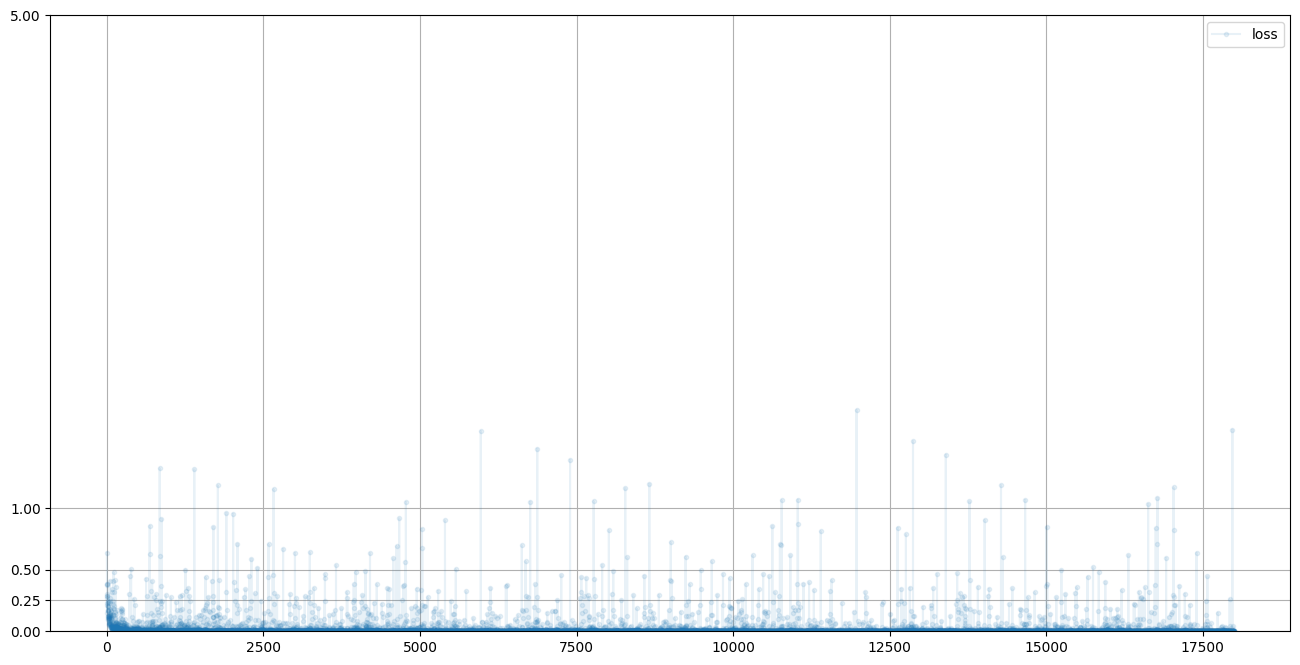

In [18]:
C.plot_progress()

In [19]:
mnist_test_dataset = MnistDataset('mount/My Drive/Colab Notebooks/mnist_data/mnist_test.csv')



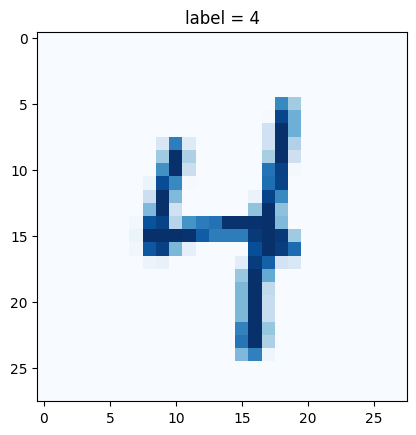

In [20]:
record = 19

mnist_test_dataset.plot_image(record)

<Axes: >

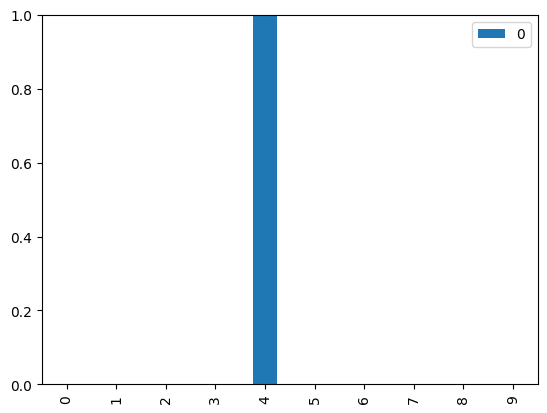

In [28]:
image_data = mnist_test_dataset[record][1]

output = C.forward(image_data.view(1,1,28,28))

pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend=True, ylim=(0,1))

In [29]:
# 测试分类器的性能

score = 0
items = 0

for label, image_data_tensor, target_tensor in mnist_test_dataset:

  items += 1
  output = C.forward(image_data_tensor.view(1,1,28,28))
  answer = numpy.argmax(output.detach().numpy())

  if answer == label:
    score += 1
    pass

  pass

print(score, items, score/items)

9795 10000 0.9795
